In [1]:
# Importing data manipulation library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string 

# Importing systems library
import os
import sys
sys.path.append(".")
import zipfile 
import argparse


# Importing from Sci-Kit Learn
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

In [2]:
folder_path = os.path.join("..","data","corpus.csv")
if not os.path.exists(folder_path): # If the folder path does not exist, unzip the folder, if it exists do nothing 
    print("Unzipping file")
    path_to_zip = os.path.join("..","data","archive.zip") # Defining the path to the zip file
    zip_destination = os.path.join("..","data") # defining the output destination

    with zipfile.ZipFile(path_to_zip,"r") as zip_ref: # using the package from zipfile, to un zip the zip file
        zip_ref.extractall(zip_destination) # Unzipping
print("The files are unzipped")

The files are unzipped


In [3]:
corpus = pd.read_csv(os.path.join("..","data","presidential_speeches.csv"))

In [4]:
corpus["Party"].value_counts()

Democratic               478
Republican               389
Democratic-Republican     65
Unaffiliated              39
Whig                      12
Federalist                 9
Name: Party, dtype: int64

### Removing rows that are not democratic or republican

In [5]:
corpus_true = corpus[corpus['Party'].isin(['Democratic', 'Republican'])]
len(corpus_true)


867

## Stopwords function

In [6]:
def clean_data(corpus): 
    text = re.sub(r'\([^)]*\)', '', corpus) # Remove text between parentheses
    text = re.sub("[^A-Za-z]+", " ", text)  # Removes everything that is not words.
    # Return text in lowercase and stripped of whitespaces
    text = text.lower().strip()
    return text

In [7]:
corpus_true['cleaned'] = corpus_true['Transcript'].apply(lambda x: clean_data(x))

/tmp/ipykernel_2588/3484643261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['cleaned'] = corpus_true['Transcript'].apply(lambda x: clean_data(x))


In [8]:
    X = corpus_true["cleaned"] # column text to variable X
    y = corpus_true["Party"] # column label to variable Y

In [9]:
vectorizer = TfidfVectorizer(
                            stop_words = "english",
                            max_features = 500,
                            ngram_range = (1,2),
                            min_df = 5,
                            max_df = 0.95)

In [10]:
X_train_feats = vectorizer.fit_transform(X)


In [11]:
X_train_feats.shape

(867, 500)

# Clustering

In [12]:
from sklearn.cluster import KMeans

In [40]:
# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=2).fit(X_train_feats)

# Get the labels using KMeans
pred_labels = kmeans.labels_

/home/coder/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
dbi = metrics.davies_bouldin_score(X_train_feats.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_feats.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  3.610755638579572 
Silhoutte Score:  0.036715150685632914


In [42]:
max_clusters = 10
wcss = []
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_feats)
    wcss.append(kmeans.inertia_)

/home/coder/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


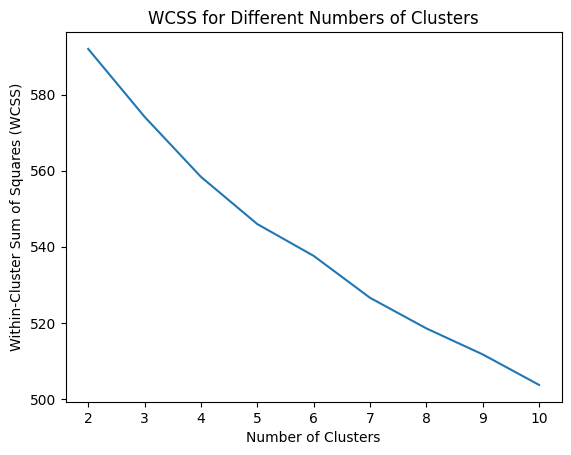

In [43]:
# Plot the WCSS values
plt.plot(range(2, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS for Different Numbers of Clusters')
plt.show()


https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7

## Sil score clusters

In [47]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_feats)
clusters = kmeans.labels_

/home/coder/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
from sklearn.decomposition import PCA

In [49]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_train_feats.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [50]:
corpus_true['cluster'] = clusters
corpus_true['x0'] = x0
corpus_true['x1'] = x1

/tmp/ipykernel_2588/3447065953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['cluster'] = clusters
/tmp/ipykernel_2588/3447065953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['x0'] = x0
/tmp/ipykernel_2588/3447065953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

## ADd to the end of the script this shows what seperates the clusters

In [51]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X_train_feats.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
constitution,people,public,state,shall,congress,united states,united,government,states

Cluster 1
government,ve,nation,war,new,peace,american,america,world,people


In [52]:
# map clusters to appropriate labels 
cluster_map = {0: "1", 1: "2"}#, 2: "3", 3: "4", 4: "5"}
# apply mapping
corpus_true['cluster'] = corpus_true['cluster'].map(cluster_map)

/tmp/ipykernel_2588/166482725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['cluster'] = corpus_true['cluster'].map(cluster_map)


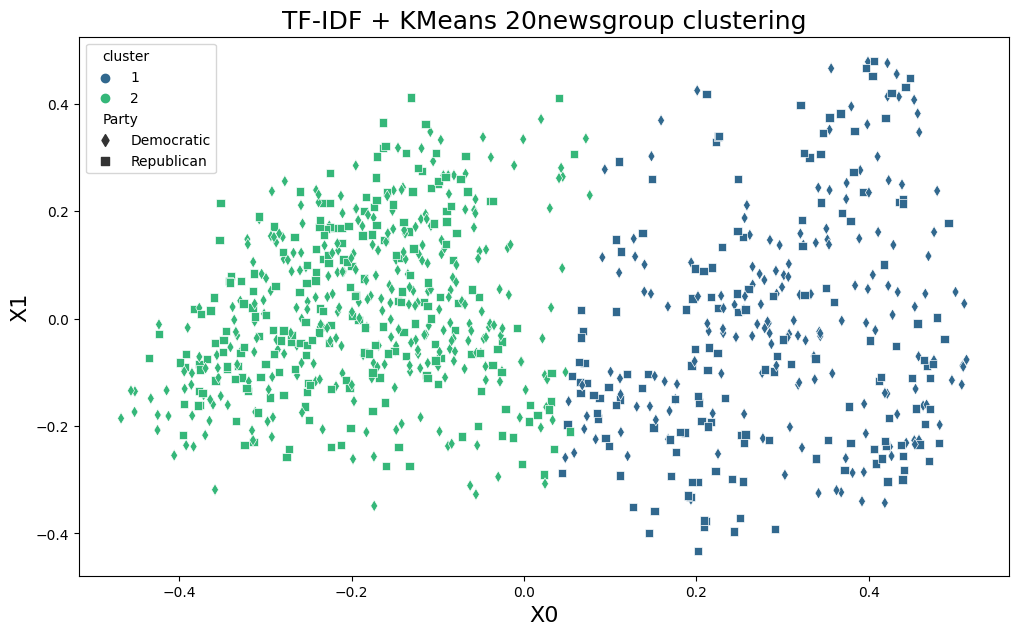

In [53]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=corpus_true, x='x0', y='x1', hue='cluster', palette="viridis", style='Party', markers={'Democratic': 'd', 'Republican': 's'})
plt.show()

## Elbow method score cluster 

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_feats)
clusters = kmeans.labels_


# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_train_feats.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


corpus_true['cluster'] = clusters
corpus_true['x0'] = x0
corpus_true['x1'] = x1


def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X_train_feats.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)



# map clusters to appropriate labels 
cluster_map = {0: "1", 1: "2", 2: "3", 3: "4"}
# apply mapping
corpus_true['cluster'] = corpus_true['cluster'].map(cluster_map)

/home/coder/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0
years,american,going,mr,know,think,president,america,ve,people

Cluster 1
nation,united,new,american,america,nations,war,people,peace,world

Cluster 2
law,united states,united,shall,country,people,public,congress,states,government

Cluster 3
treaty,congress,president,shall,constitution,state,government,united,united states,states


/tmp/ipykernel_2588/899826364.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['cluster'] = clusters
/tmp/ipykernel_2588/899826364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_true['x0'] = x0
/tmp/ipykernel_2588/899826364.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

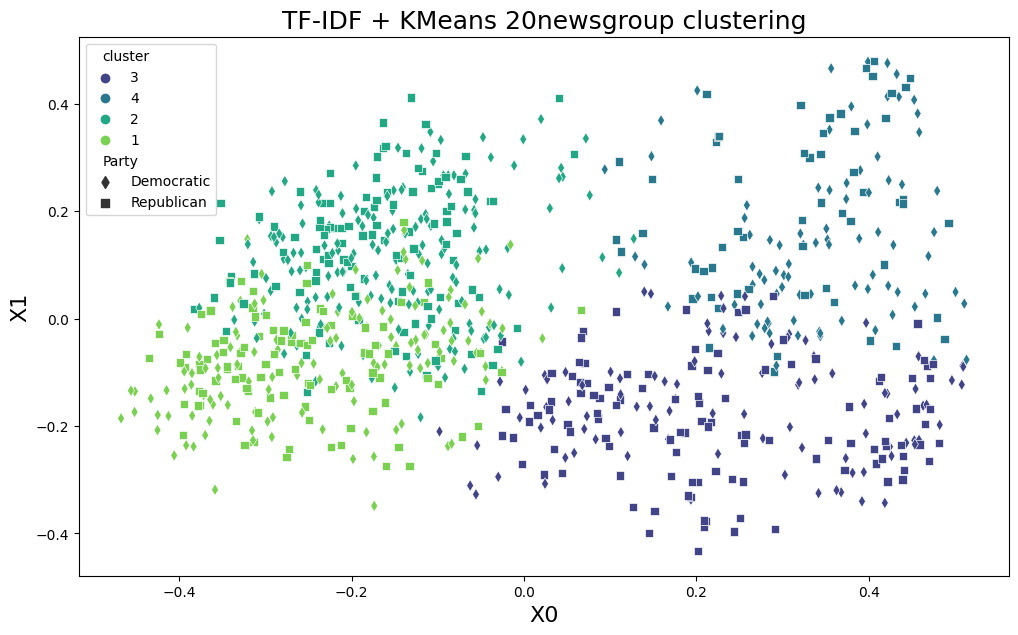

In [55]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=corpus_true, x='x0', y='x1', hue='cluster', palette="viridis", style='Party', markers={'Democratic': 'd', 'Republican': 's'})
plt.show()